In [1]:
from matplotlib import pyplot as plt
import numpy as np
import os
import pandas as pd
import cv2
np.random.seed(55)

In [2]:
im_size = (50, 50)
path = "/home/pranav/My Data/M.Tech/ML/Lab Assignments/Assignment-4_PCA/yalefaces/yalefaces/"
data_path = dict()
p = list(os.listdir(path))
types = ["glasses","happy","noglasses","leftlight","rightlight","normal","sad","sleepy","surprised","wink"]

In [3]:
for i in range(len(p)):
    if p[i].split('.')[-1] in types:
        data_path[i] = os.path.join(path, p[i])
data_path = pd.DataFrame(list(data_path.values()),index=range(1,len(data_path)+1),columns=['path'])
del p

In [4]:
def next_image():
    for i in data_path['path']:
        img = np.asarray(plt.imread(i), dtype='float32')
        img = cv2.resize(img, im_size)
        img /= 255.0
        print(type(img))
        yield img.ravel()

In [5]:
X = []
for i in next_image():
    X.append(i)
X = np.array(X)
del i
X.shape

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.nd

(150, 2500)

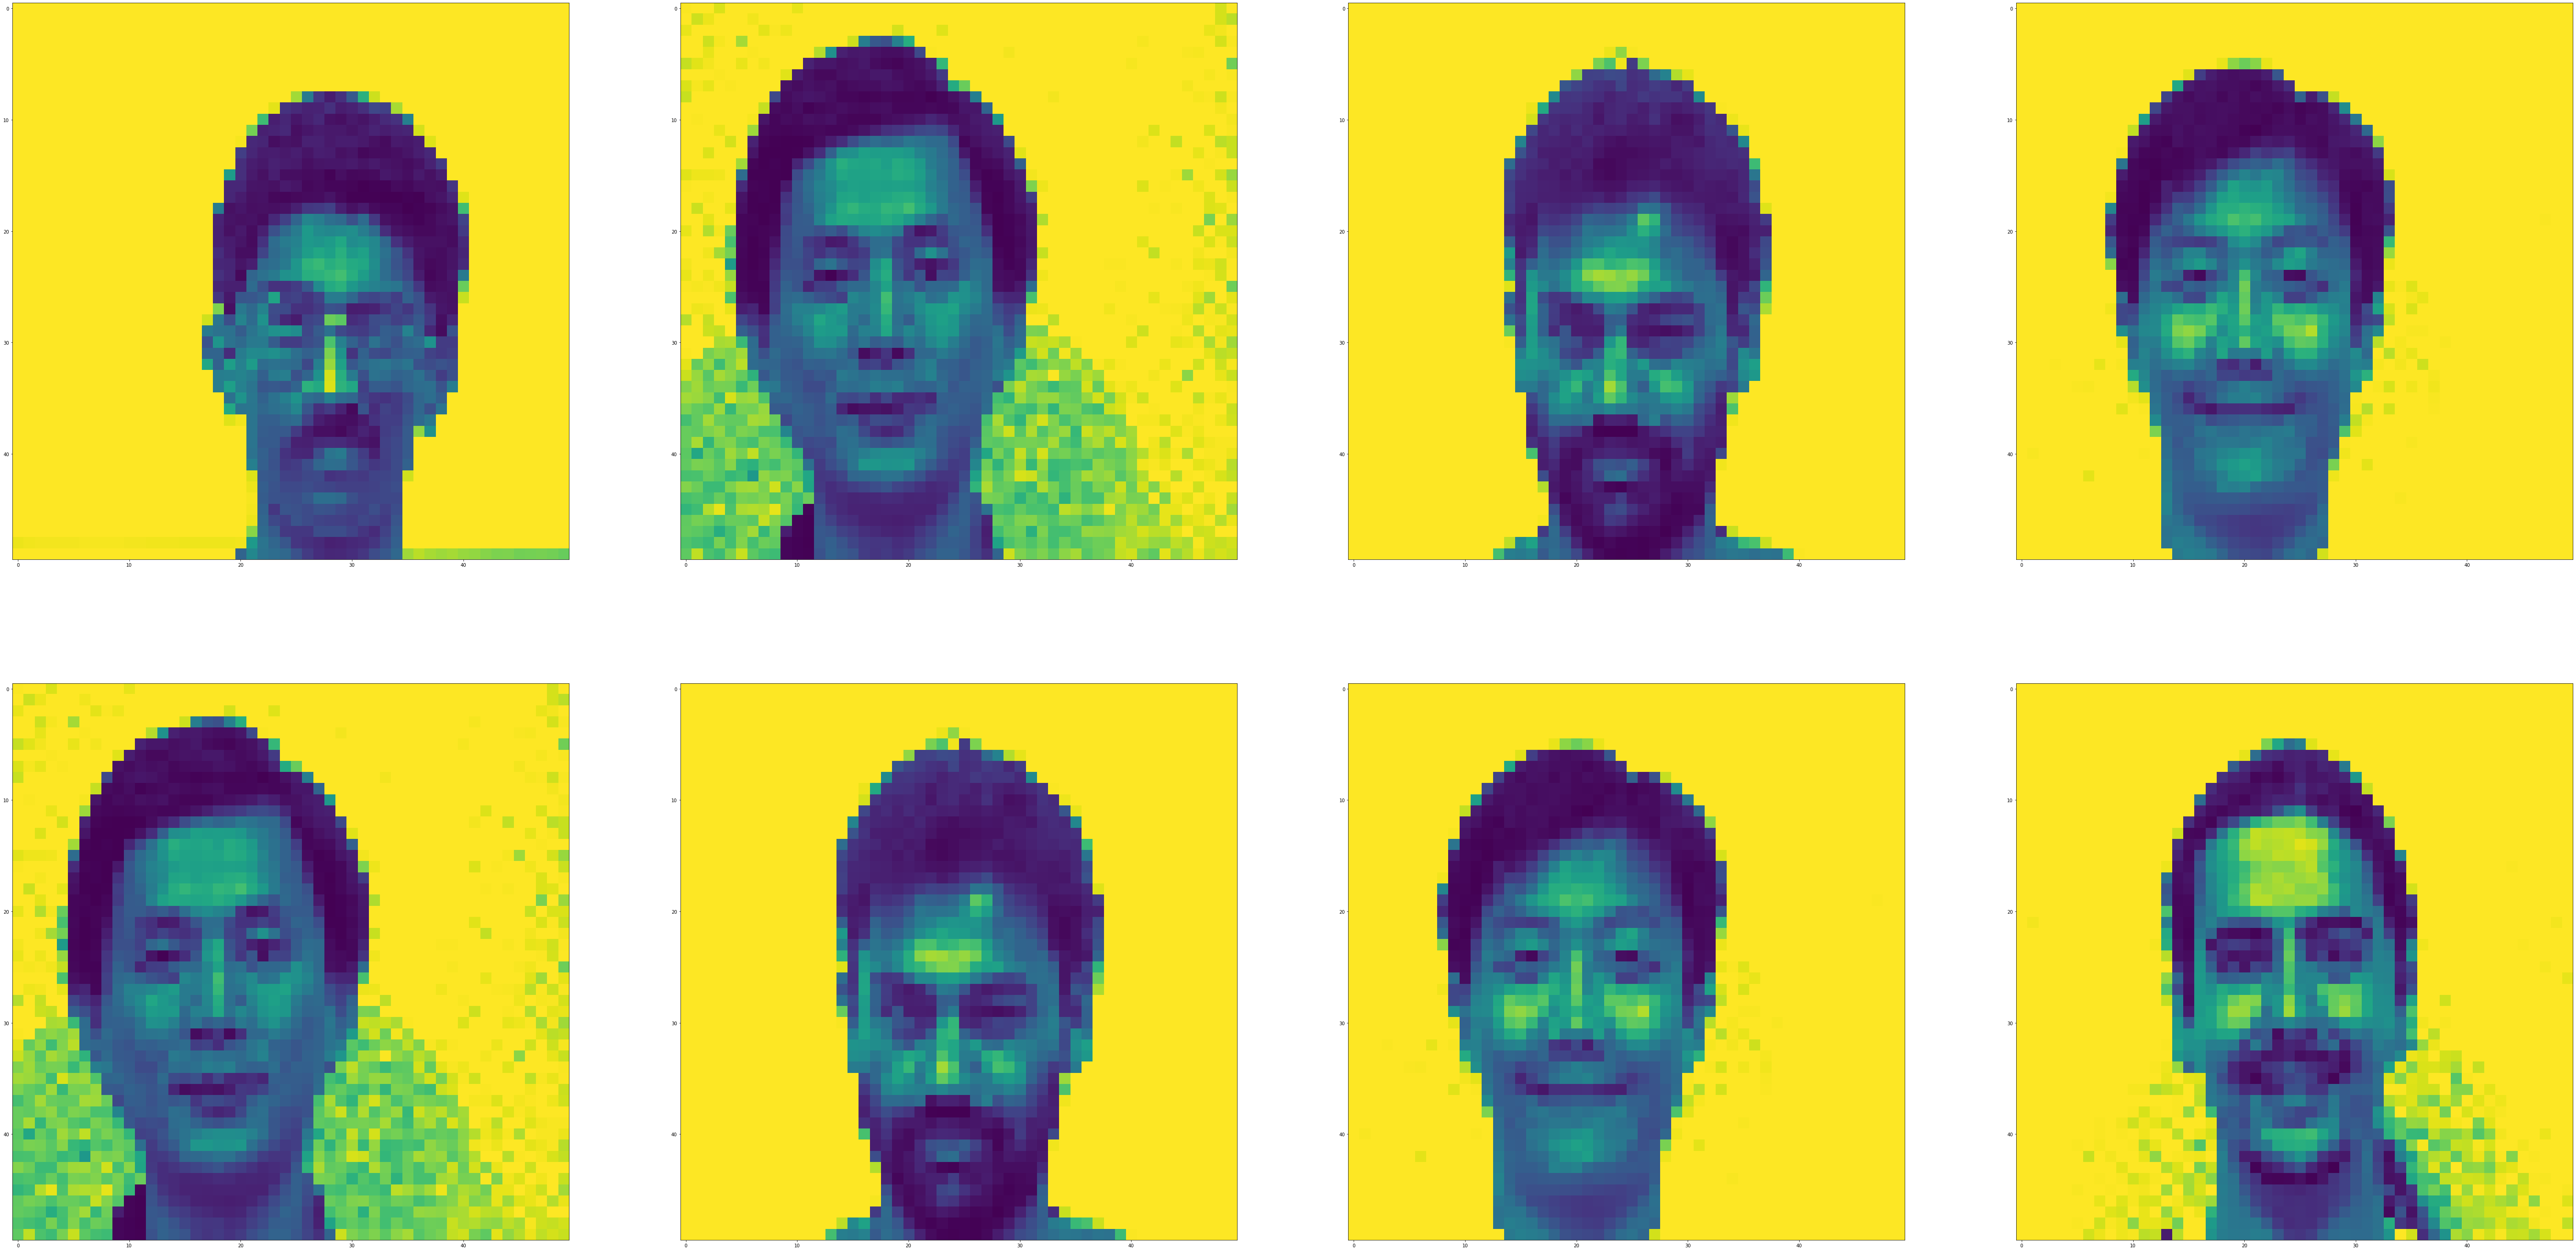

In [8]:
rand = np.random.randint(low=0, high=150, size = 8)
_, ax = plt.subplots(nrows=2, ncols=4, figsize=(100, 50))
for i in range(2):
    for j in range(4):
        ax[i][j].imshow(X[rand[i+j]].reshape(im_size))
plt.show()

In [9]:
M = X - X.mean(axis=0) #mean subtracted images

In [23]:
M.shape

(150, 2500)

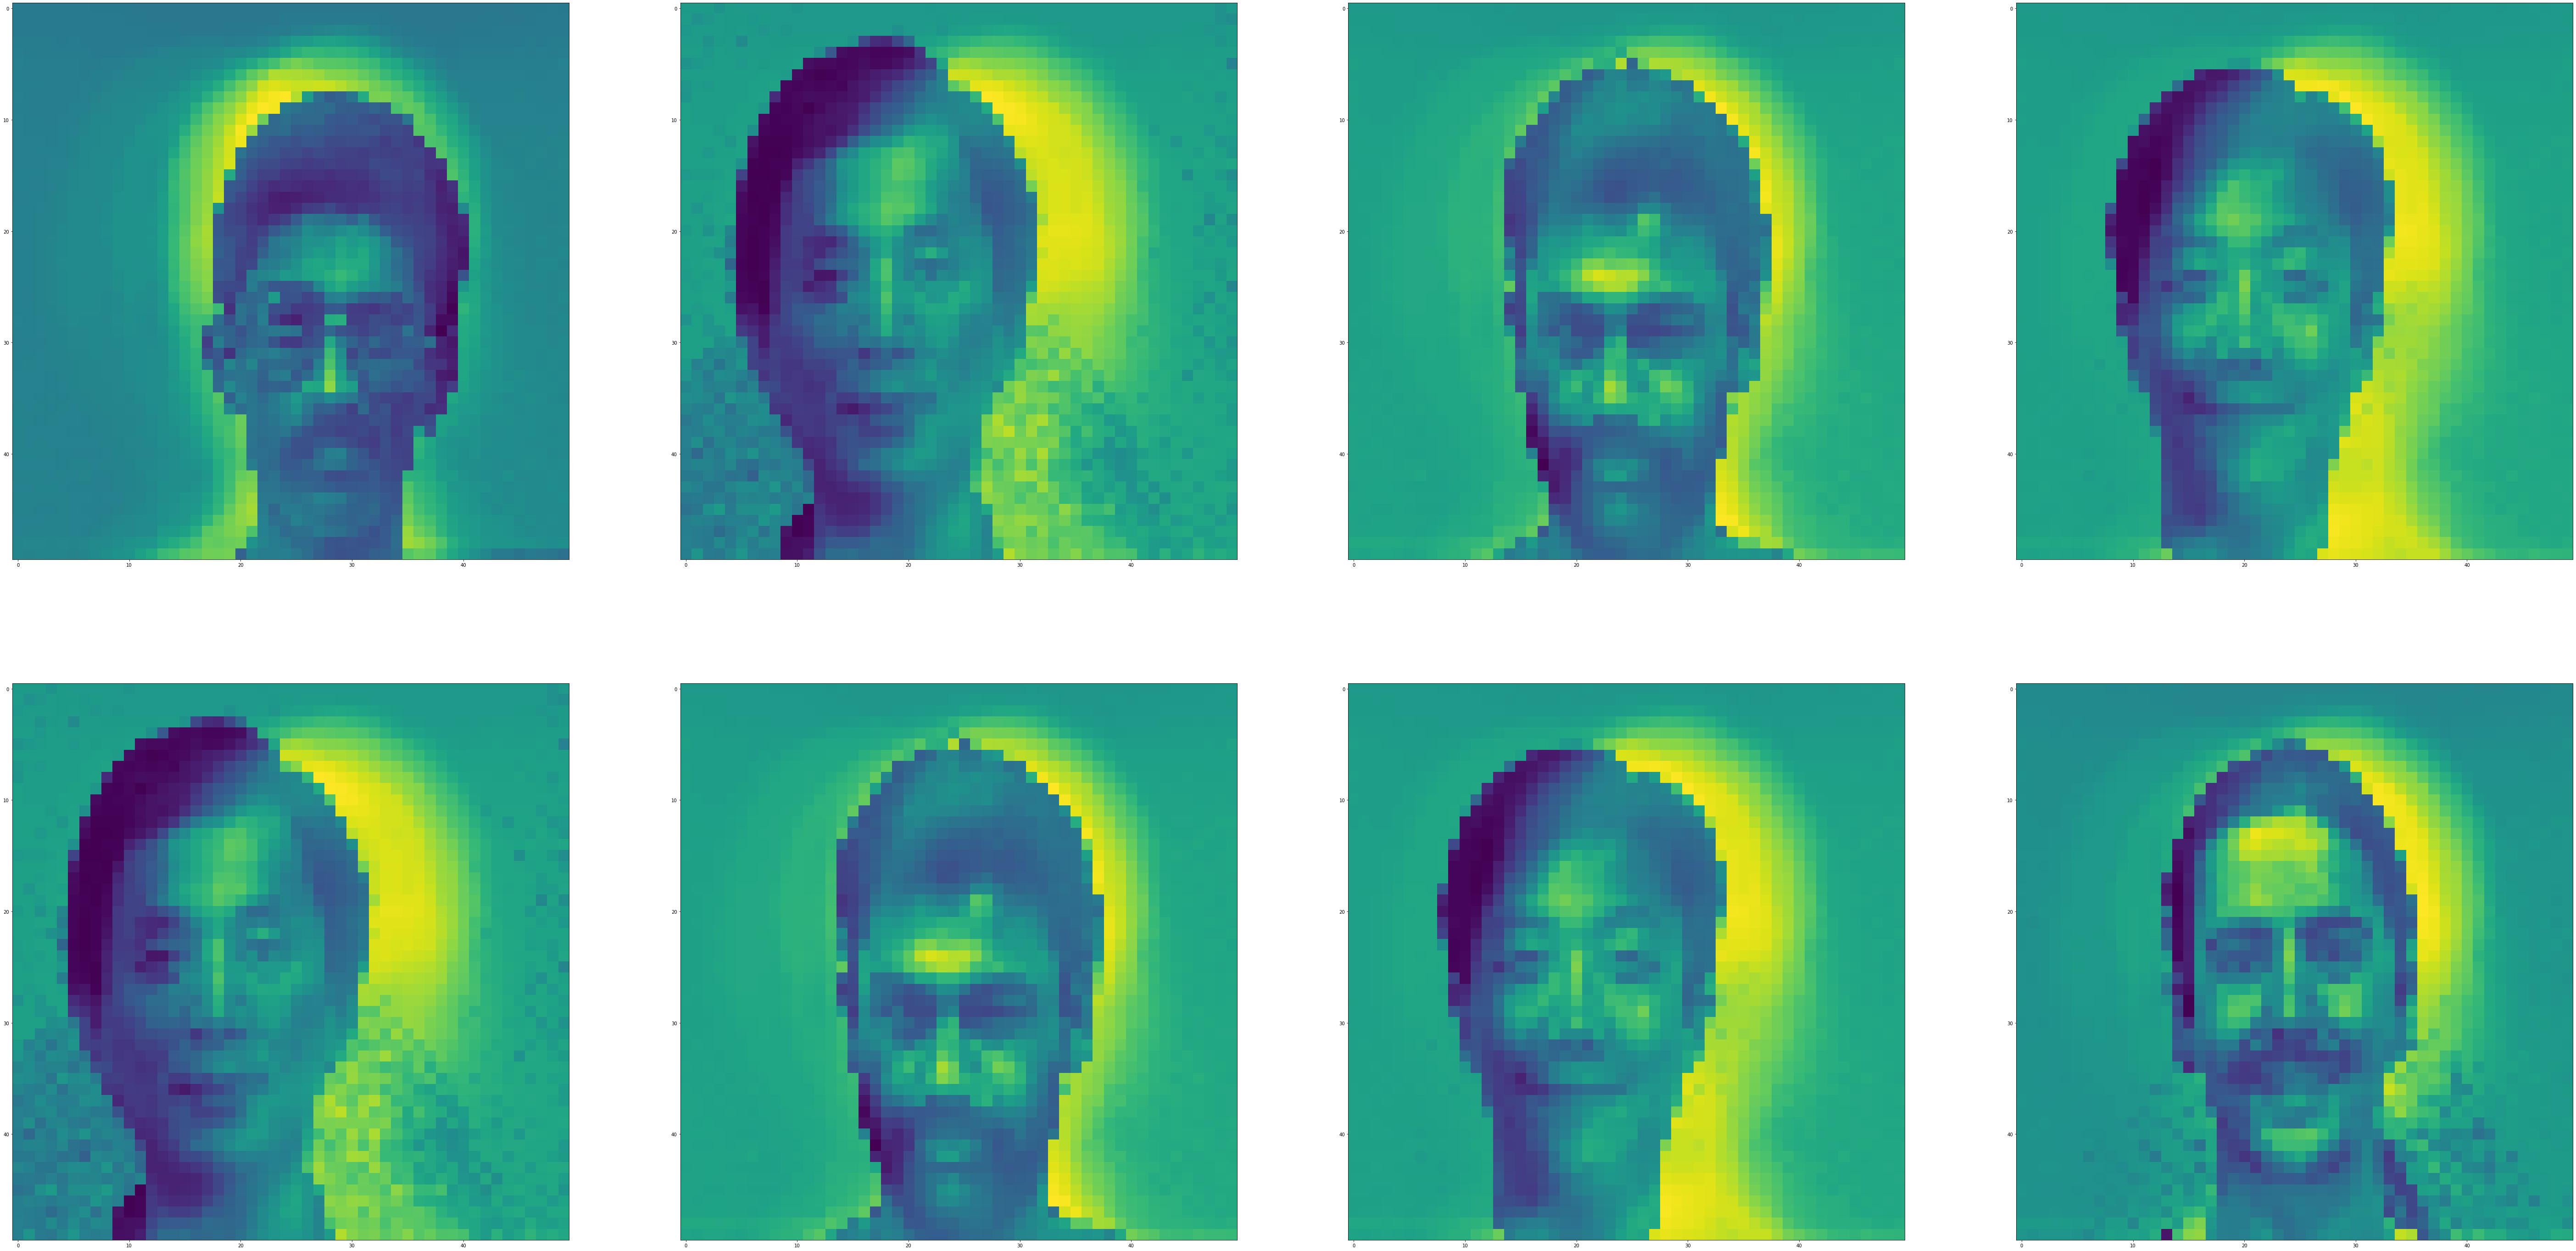

In [10]:
_, ax = plt.subplots(nrows=2, ncols=4, figsize=(100, 50))
for i in range(2):
    for j in range(4):
        ax[i][j].imshow(M[rand[i+j]].reshape(im_size))
plt.show()

In [11]:
def PCA(M):
    C = np.cov(M.T) #shape : (164, 164)
    print("Covariance matrix dimensions = ",C.shape)
    U, V = np.linalg.eigh(C) # U -values, V- vectors
    print(f"U : {U.shape}, V : {V.shape}")
    return [U, V]
def plot(X, re=True):
    if re:
        plt.imshow(X.reshape(im_size))
        return
    plt.imshow(X)

In [12]:
U, V = PCA(M)

Covariance matrix dimensions =  (2500, 2500)
U : (2500,), V : (2500, 2500)


In [22]:
for i in range(100):
    print(U[i])

-1.926232178280389e-14
-1.321907368232343e-14
-9.669079313138516e-15
-7.234090770506357e-15
-6.834080000980221e-15
-6.491576796641803e-15
-5.510112538760001e-15
-5.013575961647838e-15
-4.823557299344292e-15
-4.725988667036333e-15
-4.6783456755207e-15
-4.5495416161495e-15
-4.532691068809255e-15
-4.437471112900358e-15
-4.42365767707403e-15
-4.3225996118484294e-15
-4.274015844463485e-15
-4.188507406363154e-15
-4.174343499151103e-15
-4.162509485982295e-15
-4.161959400110528e-15
-4.1589451542502e-15
-4.021690266410034e-15
-3.962223517116058e-15
-3.950437811661212e-15
-3.931068841230346e-15
-3.886234615007162e-15
-3.865626687945474e-15
-3.849353611265556e-15
-3.8356784621778615e-15
-3.830481155477858e-15
-3.741732498509626e-15
-3.722189905486382e-15
-3.6940593396810786e-15
-3.647206220270593e-15
-3.628884572954137e-15
-3.620279336211106e-15
-3.558374417258331e-15
-3.5536676444172294e-15
-3.5462637980935794e-15
-3.5444780560794326e-15
-3.525929231272174e-15
-3.5180900543087215e-15
-3.45656474

# Displaying Eigen Faces

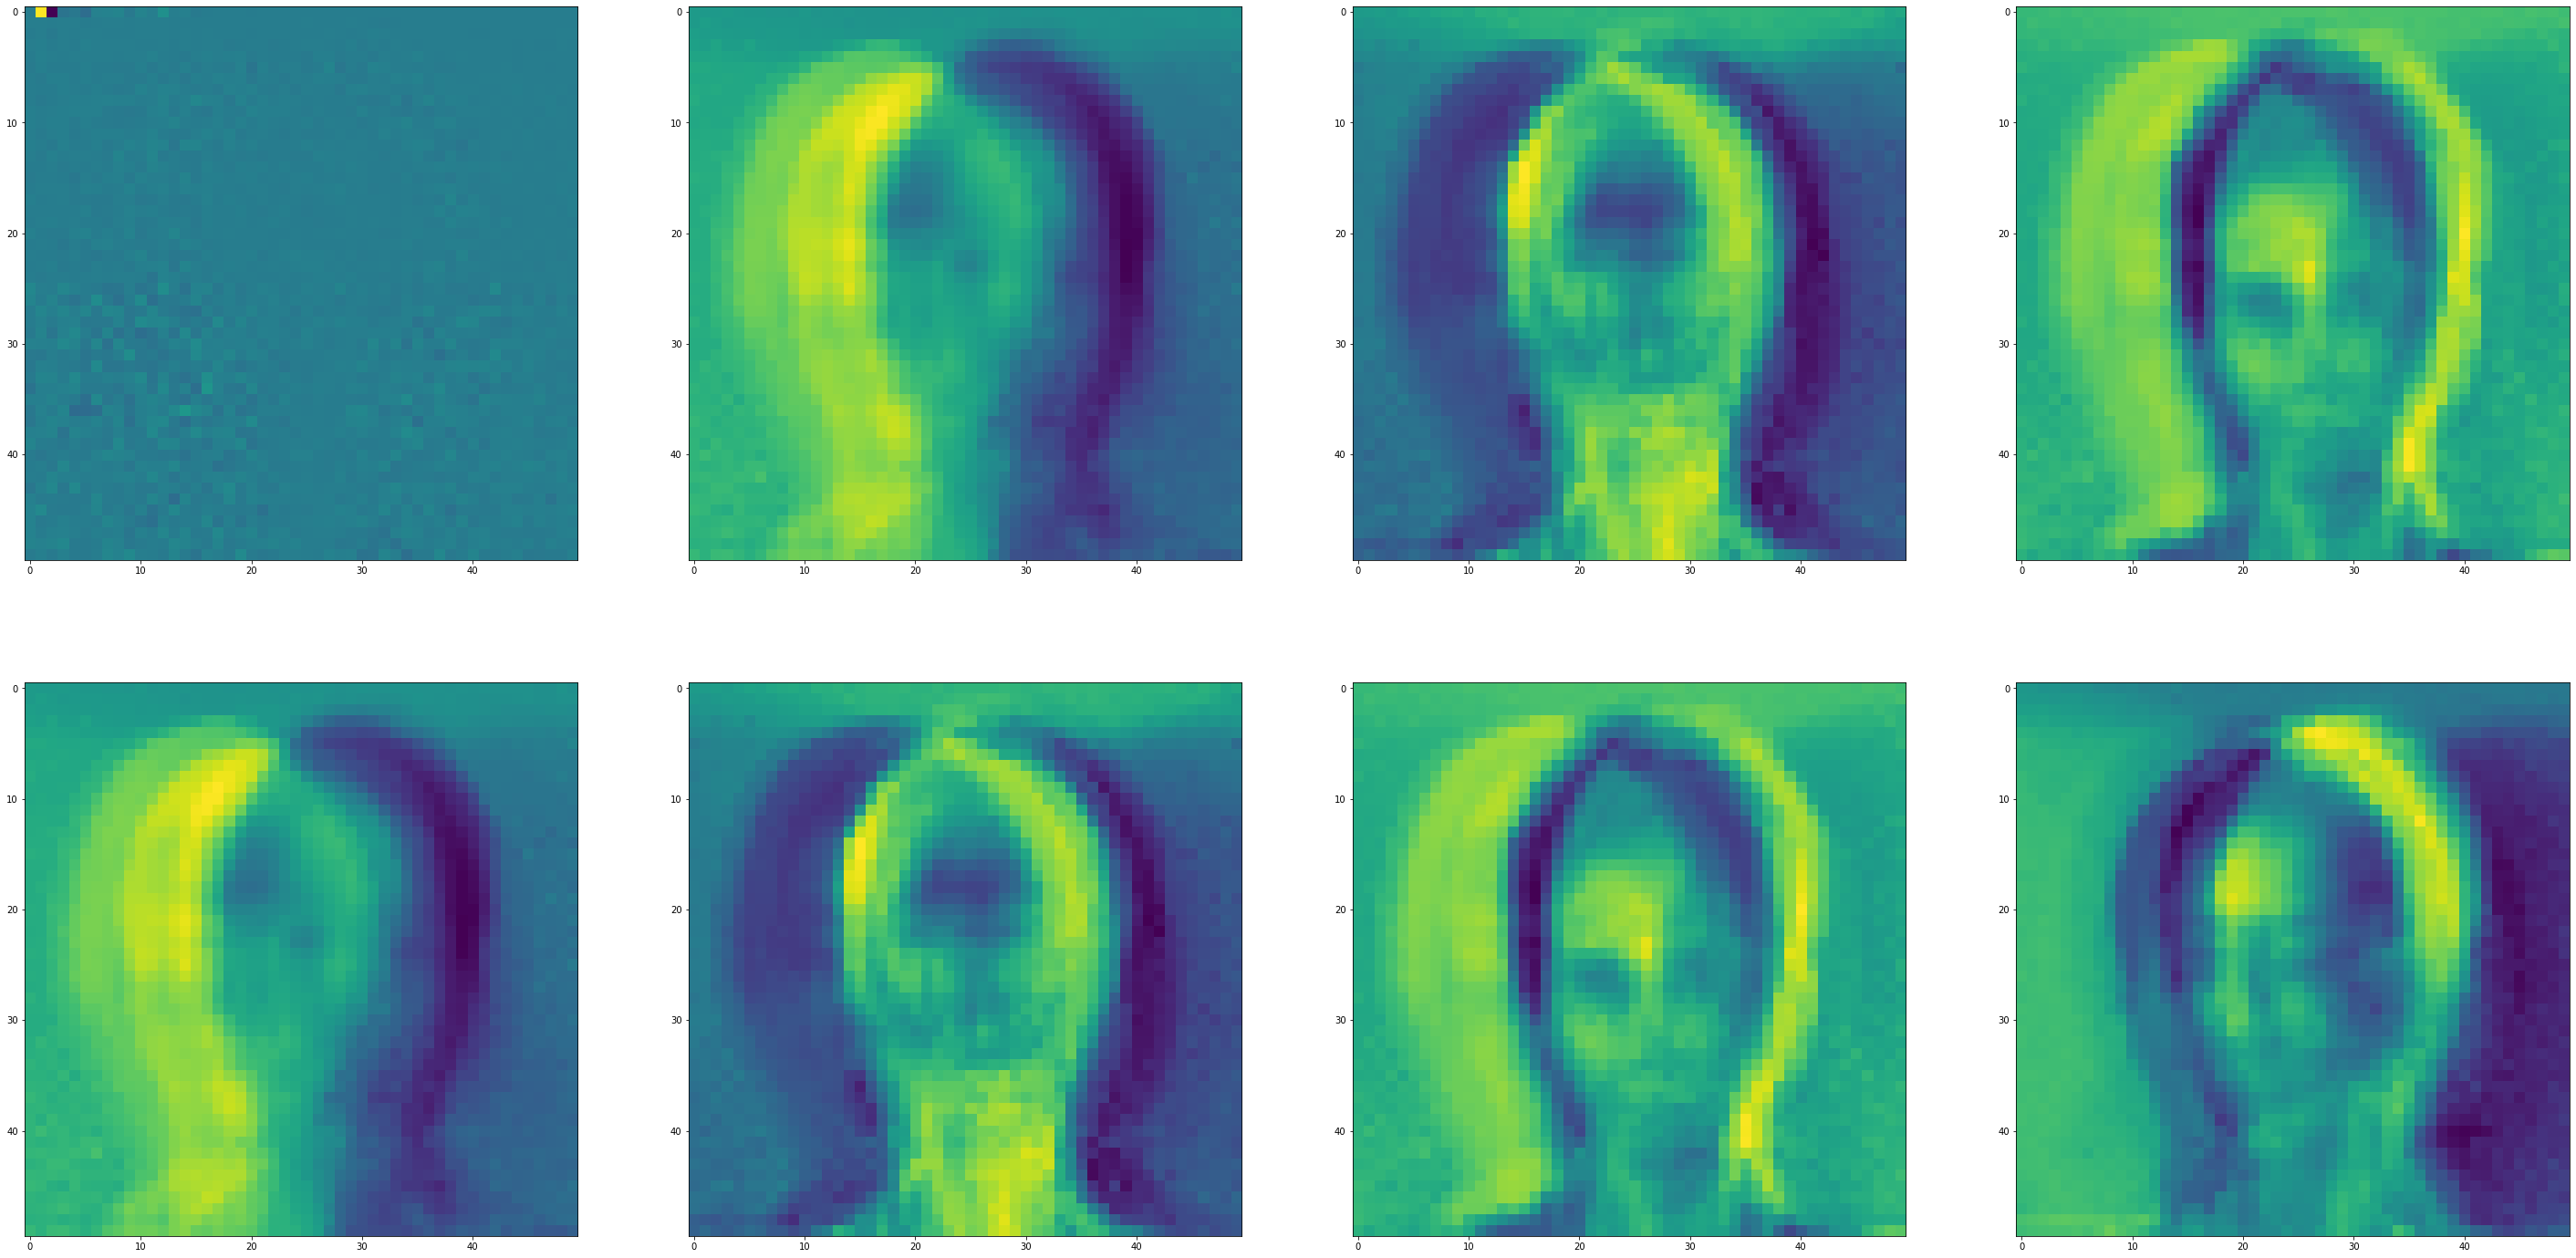

In [13]:
_, ax = plt.subplots(nrows=2, ncols=4, figsize=(50, 25)) 
for i in range(2): #Largest 8 components
    for j in range(4):
        ax[i][j].imshow(V[:, -i-j].reshape(im_size))
plt.show()

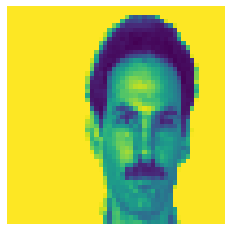

In [14]:
testface = cv2.resize(plt.imread(str(path+"subject02.centerlight")), im_size) - X.mean(axis=0).reshape(im_size)
plt.axis("off")
plt.imshow(testface) #Mean subtracted Image Test Image

In [15]:
print(V[:, :10].shape, V[:, :10].T.shape, testface.flatten().T.shape) #(4096,10)*(10,4096) =  (4096,4096) * (4096*1))  = (4096,1)

(2500, 10) (10, 2500) (2500,)


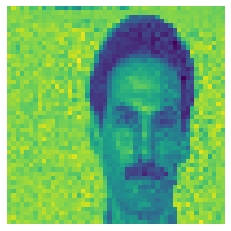

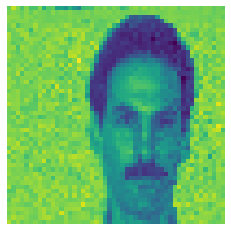

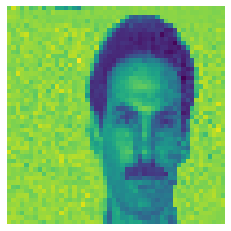

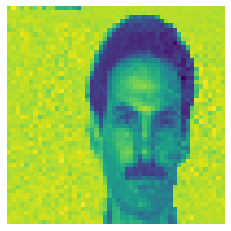

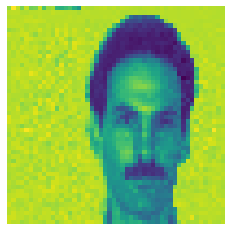

In [20]:
rlist = [2000, 2100, 2200, 2300, 2400 ]# 2600, 4000] #Eigenfaces
for i in rlist:
    recon_face = X.mean(axis=0) + V[:, -i:] @ V[:, -i:].T @ testface.flatten()
    rface = recon_face.reshape(im_size)
    img = plt.imshow(rface)
#     img.set_cmap('gray')
    plt.axis("off")
    plt.show()

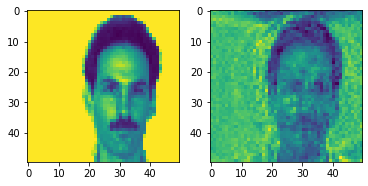

In [18]:
_, ax = plt.subplots(nrows=1, ncols=2)
ax[0].imshow(testface)
rec = recon_face = X.mean(axis=0) + V[:, -500:] @ V[:, -500:].T @ testface.flatten()
rface = rec.reshape(im_size)
ax[1].imshow(rface)
plt.show()